<a href="https://colab.research.google.com/github/Geoffrey-Chege/GEOFFREY-MORINGA-CORE-IP-W4/blob/main/GEOFFREY_CHEGE_MWANGI_MORINGA_CORE_IP_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A PYTHON PROJECT TO UNDERSTAND ELECTRIC CAR USAGE


# 1 INTRODUCTION

## 1.1 Defining the question

In [298]:
# Investigating the electric (bluecars) car usage in Paris during weekdays.

# Test a Hypothesis: whether there is difference in the means of blue cars taken in two different postal codes selected randomly.

## 1.2 Metrics for success

In [299]:
# Exploratory Data Analysis
# Univariate, Bivariate Analysis
# Create Visualizations
# Testing a Hypothesis
# Challenging the solution.

## 1.3 Understanding the context

In [300]:
# In this project we will seek to understand electric car usage by solving for another research question.

# We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

# To do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method,

# Then perform hypothesis testing with regards to the claim that we will have made.

# An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. 

# The selected periods of interest be either weekdays or weekends but not a mix of both. 

# We can also consider postal codes as some of the areas of interest. 

## 1.4 The experimental design taken

In [301]:
# Exploratory Data Analysis
# Data Cleaning
# Univariate, Bivariate Analysis
# Visualizations
# Testing a Hypothesis
# Challenge our solution by providing insights on how we can make improvements.

## 1.5 Appropriateness of the data available

In [302]:
# Dataset

# The dataset to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset]

# The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

# 2 EXPLORATORY DATA ANALYSIS

## 2.1 Importing Libraries

In [303]:
# Importing pandas
import pandas as pd

In [304]:
#Importing numpy
import numpy as np

In [305]:
#Importing seaborn
import seaborn as sns

In [306]:
#Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling as pp

from statsmodels.stats import weightstats as stests

## 2.2 Loading the Dataset

In [307]:
autolib = pd.read_csv("/content/autolib_daily_events_postal_code (1).csv")

## 2.3 Viewing the dataset

In [308]:
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [309]:
# Checking the dataset information

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [310]:
# Checking the dataset shape i.e. number of rows and columns

print('The Autolib dataset has ' + str(autolib.shape[0]) + ' rows and ' +  str(autolib.shape[1]) + ' columns' )

The Autolib dataset has 16085 rows and 13 columns


In [311]:
# Checking if the data types in our dataset are appropriate

autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [312]:
# Checking the columns

autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [313]:
# Checking number of unique items in each column

autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [314]:
# Here we can check a Summary description of our dataset

autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# 3 Partititioning our dataframe into weekdays only

In [315]:
# In this project we should work with either weekdays or weekends. Weekdays is ideal

autolib2 = autolib[autolib['day_type'] == 'weekday']
autolib2.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [316]:
# printing the Autolib2 dataset shape

print('The Autolib2 dataset has ' + str(autolib2.shape[0]) + ' rows and ' +  str(autolib2.shape[1]) + ' columns' )

The Autolib2 dataset has 11544 rows and 13 columns


# 4 DATA CLEANING

## 4.1 Fixing column names

In [317]:
# Removing spaces in the columns names

autolib2.columns = autolib2.columns.str.lower().str.replace(" ", "")

In [318]:
# confirming the columns names

autolib2.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [319]:
# Dropping columns we do not need for this analysis
# We are only dealing with Blue cars only for this project. 

autolib2.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [320]:
# confirming that we only have the relevant columns

autolib2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


## 4.2 Missing values

In [321]:
# Checking for missing values in our dataset by column

autolib2.isnull().sum()


# No missing values as shown in output.

postalcode               0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

## 4.3 Anomalies

In [322]:
# Checking for Anomalies

# checking for duplicates 

autolib2_duplicates = autolib2[autolib2.duplicated()]
autolib2_duplicates.shape


# There are no duplicates in all the rows.

(0, 9)

## 4.4 Outliers

### 4.4.1 Boxplots

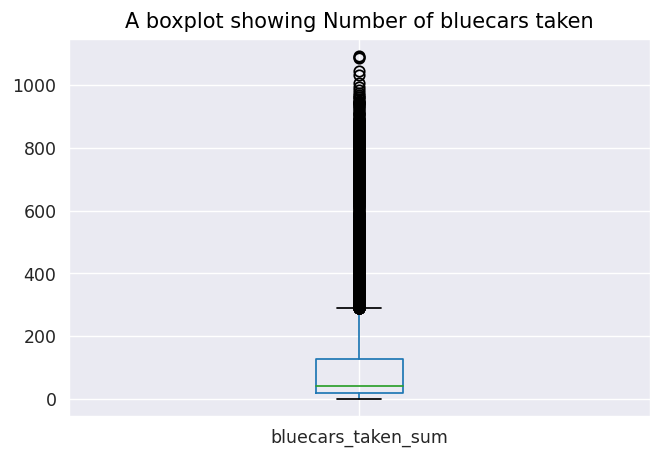

In [323]:
# Using box plots to check for outliers

# checking for outliers on the variable (bluecars_taken_sum) using boxplot


plt.figure(dpi = 125)
autolib2.boxplot(['bluecars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken", color = 'black')
plt.show()


# The boxplot shows profusion of outliers indicated by the black points.
# We will not remove them here.
# we shall investigate them instead.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


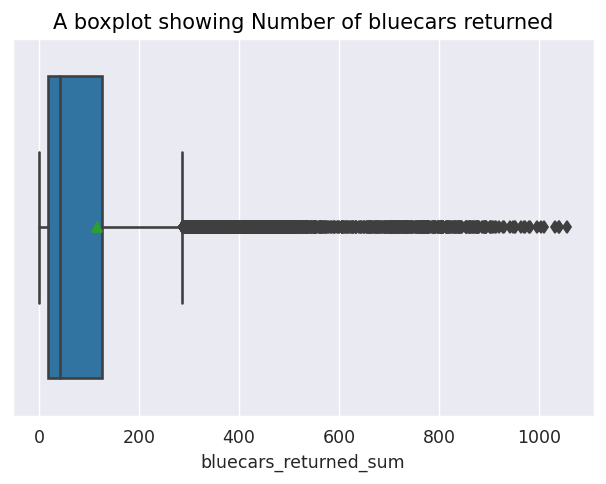

In [324]:
# Using box plots to check for outliers

# checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 125)
sns.boxplot(autolib2['bluecars_returned_sum'], showmeans = True)
plt.title("A boxplot showing Number of bluecars returned", color = 'black')
plt.show()


# The boxplot shows profusion of outliers shown by the black shaded points
# We will not remove them here.
# we shall investigate them instead.


# 5 UNIVARIATE ANALYSIS

## 5.1 Visualizations

### 5.1.1 Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


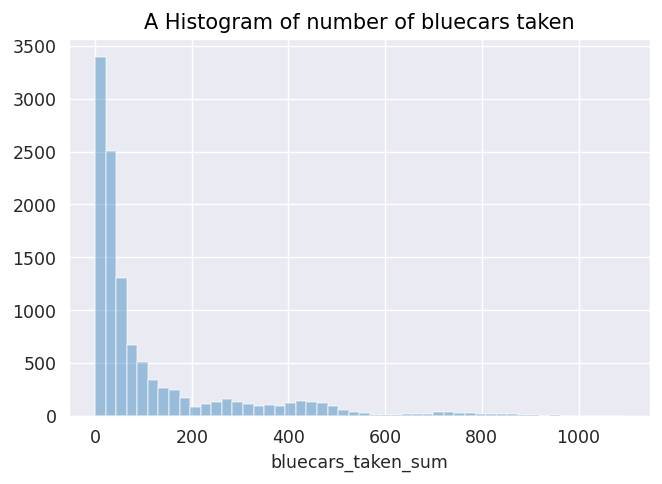

In [325]:
# Histogram of the bluecars_taken sum


plt.figure(dpi = 125)
sns.set_style("darkgrid")
sns.distplot(autolib2["bluecars_taken_sum"], kde = False)
plt.title("A Histogram of number of bluecars taken", color = 'black')
plt.show()



# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side
# and the mean is greater than the mode. This situation is also called positive skewness.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


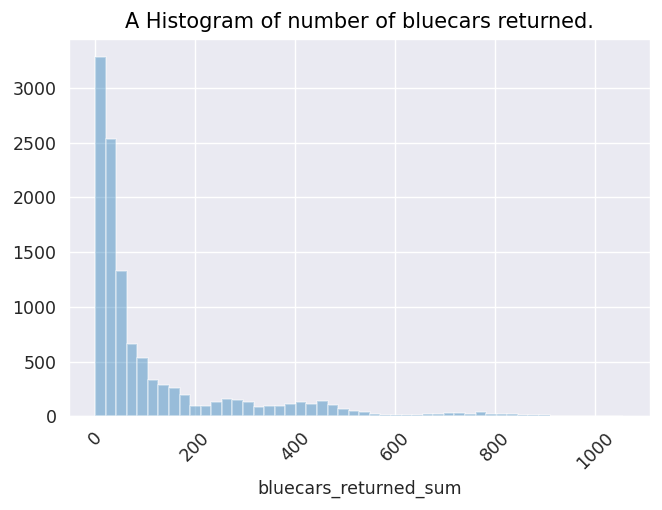

In [326]:
# Histogram of the bluecars_returned sum

plt.figure(dpi = 125)
sns.set_style("darkgrid")
sns.distplot(autolib2["bluecars_returned_sum"], kde = False)
plt.title("A Histogram of number of bluecars returned.", color = 'black')
plt.xticks(rotation = 45)
plt.show()


# the histogram shows us that the blue cars returned distribution is skewed to the right
# this is because the tail is long to the right side

### 5.1.2 Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


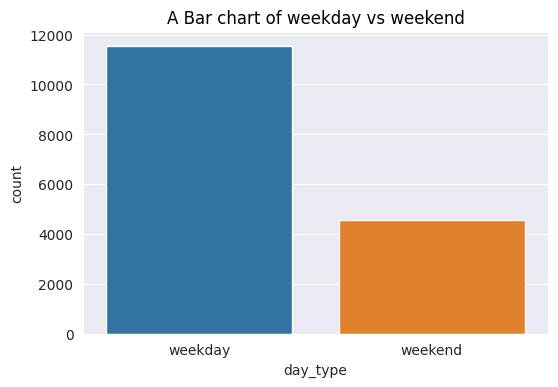

In [327]:
#  Plotting a bar plot of day_type using autolib dataset

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(autolib.day_type)
plt.title('A Bar chart of weekday vs weekend', color = 'black')
plt.show()


# The bar chart shows that blue cars usage is more during weekdays than during the weekend.

In [328]:
# Converting day of week from numericals to strings for plotting using the mapping function
# 

autolib2['dayofweek'] = autolib2.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [329]:
# Confirming that our dataset day_type columns was successfully converted to categories

autolib2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


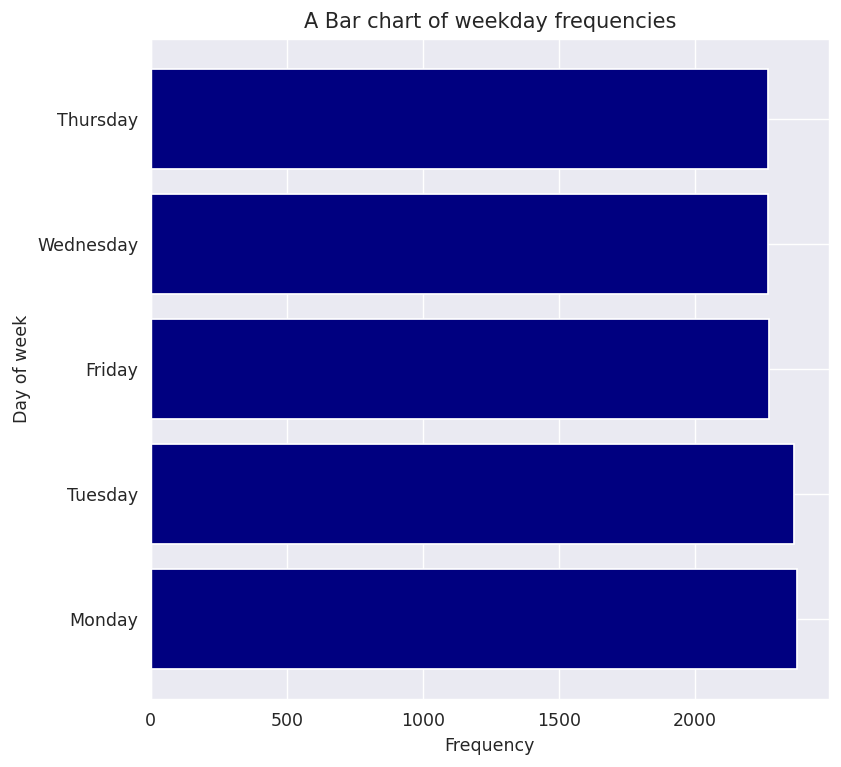

In [330]:
# # Plotting a horizontal bar plot of the day of week categories 

# grouping the data to be plotted

day = autolib2.dayofweek.value_counts()
day

# accessing the data to plot

# labels
sizes= day.index
sizes

# values
data = day.values
data

# Using matplotlib to create a bar chart
plt.figure(figsize = (7,7), dpi = 125)
plt.barh(sizes, data, color = 'navy')

# labeling the y and x axis
plt.ylabel("Day of week")
plt.xlabel('Frequency')


# Giving a title to our chart
plt.title("A Bar chart of weekday frequencies")

# Displaying our chart
plt.show()

# from the horizontal bar chart, most activities involving picking, returning, and charging blues cars took place of Monday and Tuesday
# We shall check these activities this in a more defined way in our bivariate analysis.
# Also, lets see how a pie charts represents this information in the next step


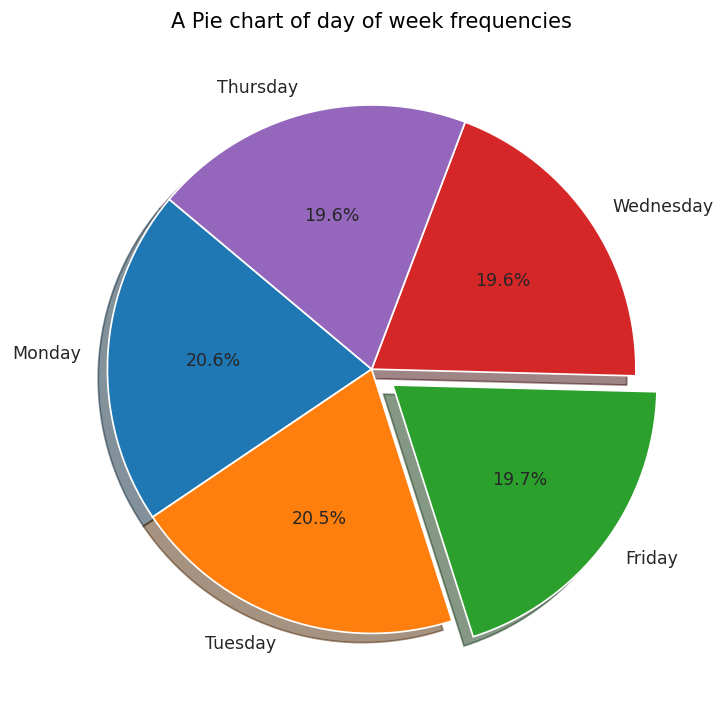

In [331]:
# # Plotting a Pie chart of the day of week categories 

# grouping the data to be plotted

day2 = autolib2.dayofweek.value_counts()
day2

# labels
sizes2= day.index
sizes2

# values
data2 = day.values
data2

# Using matplotlib to create a pie chart
plt.figure(figsize = (7,7), dpi = 125)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0), startangle = 140)

# Giving a title to our chart
plt.title("A Pie chart of day of week frequencies", color = 'black')

# Displaying our chart
plt.show()


# just like in the horizontal bar chart the activities (taking, returning, and charging) surrounding blue cars seem to be 
# equally the same throughout the week except
# on Mondays and Tuesdays where the seems to be slightly more activities compared to other days.

## 5.2 Frequency tables

In [332]:
# Frequency table of number of daily data points that were available for aggregation, that day 

# Making a crosstab
# Naming the count column

s = pd.crosstab(index = autolib2['n_daily_data_points'], columns = 'count')
s

# 1440 was the most frequent number of daily data points that were available for aggregation in most days

col_0,count
n_daily_data_points,
1174,104
1203,103
1320,103
1364,103
1370,94
1377,102
1389,103
1398,104
1411,104


In [333]:
# Frequency table of charging slots freed/released vs slots taken by day of the week


autolib2.groupby('dayofweek')[['slots_freed_sum', 'slots_taken_sum']].count()


# From the table the number of charging slots freed vs the slots taken is equal
# 

,slots_freed_sum,slots_taken_sum
dayofweek,,
Friday,2271,2271
Monday,2374,2374
Thursday,2268,2268
Tuesday,2363,2363
Wednesday,2268,2268


In [334]:
# Frequency table showing sums of bluecars taken vs bluecars returned by day of week

autolib2.groupby('dayofweek')[['bluecars_taken_sum' ,'bluecars_returned_sum']].sum()


# the sums are different
# this means that not all cars taken in day are returned the same day


,bluecars_taken_sum,bluecars_returned_sum
dayofweek,,
Friday,288546,286029
Monday,263893,264808
Thursday,263207,262961
Tuesday,261940,260470
Wednesday,261849,260673


In [335]:
# Frequency table showing sum of bluecars taken by day of week in ascending order.

autolib2.groupby('dayofweek')['bluecars_taken_sum'].sum().sort_values()



# Friday was when most blue cars were taken.
# while Wednesday was when the least number of blue cars were taken.

dayofweek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: bluecars_taken_sum, dtype: int64

In [336]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

autolib2.groupby('dayofweek')['bluecars_returned_sum'].sum().sort_values()



# Friday was when most blue cars were returned.
# while Tuesday was when the least number of blue cars were returned.

dayofweek
Tuesday      260470
Wednesday    260673
Thursday     262961
Monday       264808
Friday       286029
Name: bluecars_returned_sum, dtype: int64

In [337]:
# Frequency table showing sum of charging slots released by day of week in ascending order.

autolib2.groupby('dayofweek')['slots_freed_sum'].sum().sort_values()



# Friday was when most blue cars were released from charging slots.
# while Monday was when the least number of blue cars were released from charging slots.

dayofweek
Monday       47022
Tuesday      47095
Wednesday    47331
Thursday     48200
Friday       52143
Name: slots_freed_sum, dtype: int64

In [338]:
# Frequency table showing sum of charging slots taken by day of week in ascending order.

autolib2.groupby('dayofweek')['slots_taken_sum'].sum().sort_values()


# Friday was when most blue cars were taken to charge slots for charging.
# while Tuesday was when the least number of blue cars were taken to charge.

dayofweek
Tuesday      46969
Monday       47068
Wednesday    47223
Thursday     48023
Friday       52234
Name: slots_taken_sum, dtype: int64

In [339]:
# Frequency table of postal codes 
# In ascending order
#

autolib2.postalcode.value_counts().sort_values()


# There are quite a number of postal codes with the most number of times used.

# the least used postal code is 93390.

93390     59
93200     90
93370    105
92340    105
93150    107
        ... 
75012    112
75004    112
78150    112
93700    112
94160    112
Name: postalcode, Length: 104, dtype: int64

## 5.3 Measures of Central Tendency

### Mean

In [340]:
# Here we  will use for loops to make our work easier.
# Defining our loop
# Displaying the mean by column

cols = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']

for column in cols:
  print("\n")
  print('The mean of' + column + ' is : ' + str(autolib2[column].mean()))


  
  # The output below shows the mean/average of each of the target column/variable.
  # we can see that the average number of bluecars taken vs returned are nearly the same and 
  # the mean of freed slots vs taken charging slots.
  



The mean ofn_daily_data_points is : 1430.0072765072764


The mean ofbluecars_taken_sum is : 116.0286729036729


The mean ofbluecars_returned_sum is : 115.63937976437977


The mean ofslots_freed_sum is : 20.94516632016632


The mean ofslots_taken_sum is : 20.921431046431046


### Mode

In [341]:
# Defining our loop
# Specifying a space between each column's output
# Displaying the mode by column


for column in cols:
  print('\n')
  print('The Mode of ' + column + ' is ; ' + str(autolib2[column].mode()))
  
  
# The output below shows the mode of each of the variables of interest.
# the mode for bluecars returned vs taken is the same as well as the mode for the charging slots freed and taken.



The Mode of n_daily_data_points is ; 0    1440
dtype: int64


The Mode of bluecars_taken_sum is ; 0    12
dtype: int64


The Mode of bluecars_returned_sum is ; 0    12
dtype: int64


The Mode of slots_freed_sum is ; 0    0
dtype: int64


The Mode of slots_taken_sum is ; 0    0
dtype: int64


### Median

In [342]:
# Using for loops to find each variable's median
# Defining our loop
# Specifying a space between each column's output
# Displaying the median by column


for column in cols:
  print('\n')
  print('The median of ' + column + ' is ; ' + str(autolib2[column].median()))
  
  
# the output indicates the median value of each variable defined in our columns of interest.
# the median for bluecars returned vs taken is the same as well as the median for the charging slots freed and taken.



The median of n_daily_data_points is ; 1440.0


The median of bluecars_taken_sum is ; 42.0


The median of bluecars_returned_sum is ; 42.0


The median of slots_freed_sum is ; 0.0


The median of slots_taken_sum is ; 0.0


## 5.4 Measures of Dispersion/Spread/Variability

### Range

In [343]:
# Using functions to find range for each target column
# Defining our function and parameters
# Calculating the maximum value
# Calculating the minimum value
# Calculating the range
# specify the return value as each column's range
# 

# Incorporating a for loop to calculate range over all the target columns
# Specifying spacing between each output
# Printing the the output as each column's range


def column_range(column):            
  max_value = autolib2[column].max()             
  min_value = autolib2[column].min()              
  col_range = max_value - min_value        
  return col_range                   

for column in cols:                              
  print('\n')                                                 
  print('The '+ column + ' range is: ' + str(column_range(column))) 
  
  
  
  
# The output shows the range for each column of interest here.



The n_daily_data_points range is: 266


The bluecars_taken_sum range is: 1093


The bluecars_returned_sum range is: 1056


The slots_freed_sum range is: 288


The slots_taken_sum range is: 294


### Interquartile range

In [344]:
# Calculating the quartiles of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Quantiles by column in cols list


for column in cols:
  print('\n')
  print(autolib2[column].quantile([0.25, 0.5, 0.75]))
  
  
  
# The output indicates the first, second, and third quartiles for each column



0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    4.0
Name: slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


### Standard deviation

In [345]:
# Calculating the Standard Deviation of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Standard Deviation by column in cols list

for column in cols:
  print('\n')
  print('The Standard Deviation of ' + column + ', is :  ' + str(autolib2[column].std()))
 



The Standard Deviation of n_daily_data_points, is :  36.88213992449968


The Standard Deviation of bluecars_taken_sum, is :  169.62690469970084


The Standard Deviation of bluecars_returned_sum, is :  168.34475125432746


The Standard Deviation of slots_freed_sum, is :  47.90020768290576


The Standard Deviation of slots_taken_sum, is :  47.84857983852817


### Variance

In [346]:
# Calculating the variance of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the variance by column in cols list


for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(autolib2[column].var()))
  
  
  # From the outputs, all the variables have a  very high variance indicating that
  # the data in each column have some very large dis-similarities amongst its members.
  # except for n_daily data points which has a fairly smaller value compared to others.



The Variance of n_daily_data_points, is :  1360.2922454103737


The Variance of bluecars_taken_sum, is :  28773.286798001394


The Variance of bluecars_returned_sum, is :  28339.955274881388


The Variance of slots_freed_sum, is :  2294.4298960655037


The Variance of slots_taken_sum, is :  2289.4865925640042


### Skewness

In [347]:
# Calculating the Skewness of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Skewness by column in cols list


for column in cols:
  print('\n')
  print('The Skewness of ' + column + ', is :  ' + str(autolib2[column].skew()))
  
  
  
# from the output, n_daily_data_points data distribution is skewed to the left since it has a negative value
# Others: bluecars_taken_sum, bluecars_returned_sum, slots_freed_sum,  and  slots_taken_sum have a positive value indicating that
# they data distributions are skewed to the right.
# this was also evident in the histograms plotted above.



The Skewness of n_daily_data_points, is :  -5.449575600011862


The Skewness of bluecars_taken_sum, is :  2.3281979815185876


The Skewness of bluecars_returned_sum, is :  2.3289726516394973


The Skewness of slots_freed_sum, is :  2.5421869688795278


The Skewness of slots_taken_sum, is :  2.5423463886866187


### Kurtosis

In [348]:
# Calculating the Kurtosis of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Kurtosis by column in cols list


for column in cols:
  print('\n')
  print('The Kurtosis of ' + column + ', is :  ' + str(autolib2[column].kurt()))

 # The kurtosis value in all the columns are greater than zero, 
# Therefore their distributions have heavier tails .... called a leptokurtic distributions
# they all have a profusion of outliers
# Just like we saw in the boxplots earlier.



The Kurtosis of n_daily_data_points, is :  31.654407529009344


The Kurtosis of bluecars_taken_sum, is :  5.553808116768028


The Kurtosis of bluecars_returned_sum, is :  5.5428632223425325


The Kurtosis of slots_freed_sum, is :  6.007229901401457


The Kurtosis of slots_taken_sum, is :  6.001264705133703


# 6 Bivariate Analysis

## 6.1 Visualizations

### 6.1.1 Scatter Plots

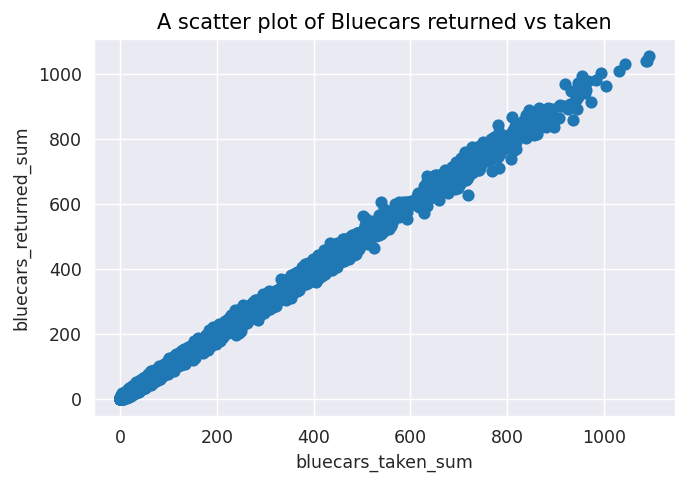

In [350]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# Specifying the chart size

plt.figure(dpi = 125)

# plotting our scatterplot using matplotlib
plt.scatter(autolib2['bluecars_taken_sum'], autolib2['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars returned vs taken', color = 'black')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()




# There is strong positive correlation between Bluecars returned vs taken.
# As the blue cars taken increases, the bluecar returned also increases.
# 

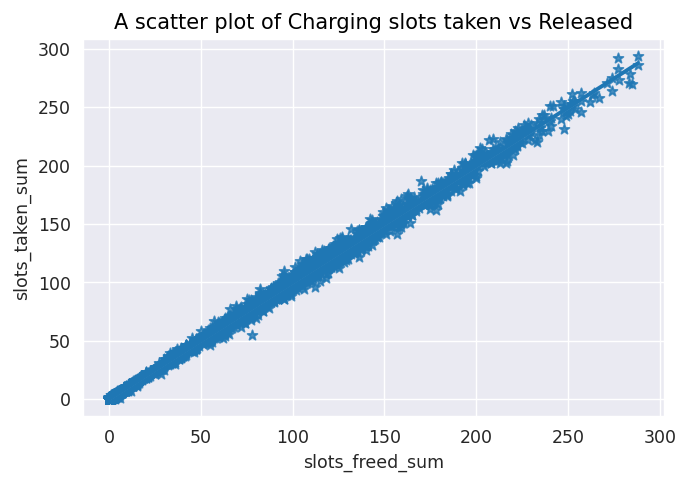

In [351]:
# Using Seaborn: 

# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot


plt.figure(dpi = 125)
sns.regplot(x = autolib2["slots_freed_sum"], y = autolib2["slots_taken_sum"], fit_reg=True, marker = '*')
plt.title("A scatter plot of Charging slots taken vs Released", color = 'black')
plt.show()



# There is strong positive correlation between charging slots taken vs released.
# As the charging slots are released increases, the taken charging also increases.
# 

### 6.1.2 Pearson correlation

In [352]:
# Correlation


# It is a statistical measure that describes the association between random variables.

# Calculate the pearson correlation coefficient; It is the most widely used correlation coefficient.

# Positive correlation is a relationship between two variables in which both variables move in tandem i.e. in the same direction.

# Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions. 

# Correlation coefficients between -.20 and .20 are generally considered weak, 

# Between .20 and .50 (positive or negative) are considered moderate, 

# Above.50 (positive or negative) are considered strong.

In [353]:
# Calculating the pearson coefficient of the entire dataframe

autolib2.corr()

,postalcode,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,1.000000,0.000174,-0.701709,-0.701877,-0.754730,-0.754422
n_daily_data_points,0.000174,1.000000,0.026295,0.026691,0.020497,0.021045
bluecars_taken_sum,-0.701709,0.026295,1.000000,0.998780,0.945700,0.944855
bluecars_returned_sum,-0.701877,0.026691,0.998780,1.000000,0.945758,0.946006
slots_freed_sum,-0.754730,0.020497,0.945700,0.945758,1.000000,0.999154
slots_taken_sum,-0.754422,0.021045,0.944855,0.946006,0.999154,1.000000


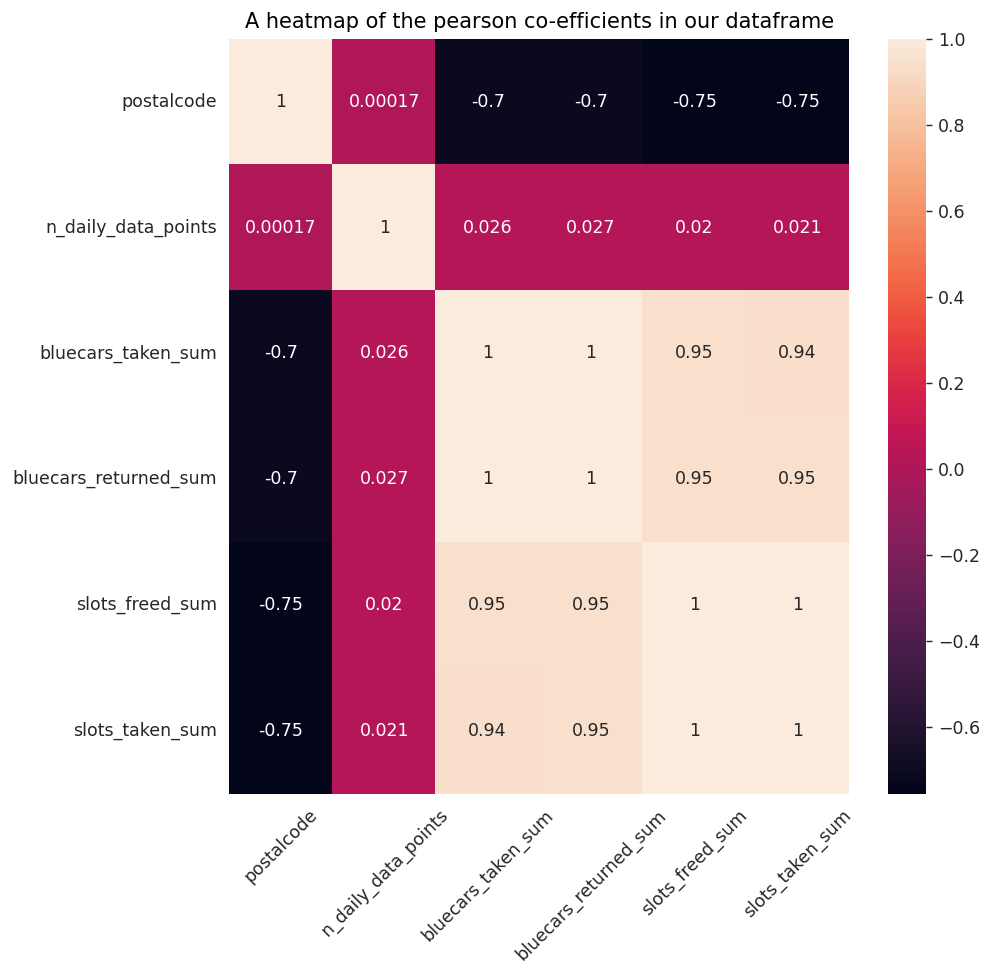

In [354]:
# Heatmap


# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


x = autolib2.corr()
plt.figure(figsize = (8,8), dpi = 125)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "black")
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()



# The brighter regions show strong positive correlation between variables.
# For example there is a strong positive correlation (0.99) between bluecars_taken_sum and bluecars_returned_sum, &	slots_freed_sum and slots_taken_sum

### 6.1.3 Line Charts

In [355]:
# To plot a meaningful line chart,
# I will use simple random sampling techinique to select a representative sample of the data
# Since there are too many observations to plot a line chart.


# then I will use stratified sampling to select a sample dataset for by each month.


# then I will plot a line chart and a stacked bar chart

# 7 Simple Random Sampling

In [356]:
# creating a new dataframe containing our simple random sample 
# sample size = 3000
# the sample will be selected without replacement


simp_samp = autolib2.sample(n = 3000, replace = 'False')


In [357]:
# Confriming the size of our sample
# viewing the head of the created sample


print(simp_samp.shape)

simp_samp.head()



(3000, 9)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
3751,78150,1/9/2018,1439,Tuesday,weekday,33,46,0,0
12239,93440,2/20/2018,1425,Tuesday,weekday,3,3,0,0
6639,92240,4/4/2018,1440,Wednesday,weekday,95,91,0,0
5932,92200,1/8/2018,1438,Monday,weekday,32,32,0,0
5910,92190,6/5/2018,1439,Tuesday,weekday,62,59,0,0


In [358]:
## converting the date column to datetime format 
#  We will extract the month for plotting purposes

simp_samp['date'] = pd.to_datetime(simp_samp.date)

# 8 Stratified Sampling

In [359]:
# creating a new column called month
# we shall use the column month to select our stratifies sample by each month

simp_samp['month'] = pd.DatetimeIndex(simp_samp['date']).month  

In [360]:
# checking the new column created

simp_samp.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
3751,78150,2018-01-09,1439,Tuesday,weekday,33,46,0,0,1
12239,93440,2018-02-20,1425,Tuesday,weekday,3,3,0,0,2
6639,92240,2018-04-04,1440,Wednesday,weekday,95,91,0,0,4
5932,92200,2018-01-08,1438,Monday,weekday,32,32,0,0,1
5910,92190,2018-06-05,1439,Tuesday,weekday,62,59,0,0,6


In [361]:
# Selecting a stratified sample 
# By month of the year.

strat_samp = simp_samp.groupby(['month'],group_keys = False).apply(lambda month : month.sample(frac = 0.5))

In [362]:
# checking the new stratified sample selected

print(strat_samp.shape)

strat_samp.head()

(1499, 10)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
10891,93230,2018-01-24,1434,Wednesday,weekday,36,38,0,0,1
5950,92200,2018-01-26,1437,Friday,weekday,70,74,0,0,1
312,75003,2018-01-01,1440,Monday,weekday,264,250,45,43,1
7962,92340,2018-01-10,1440,Wednesday,weekday,22,21,0,0,1
6106,92210,2018-01-26,1437,Friday,weekday,84,93,0,0,1


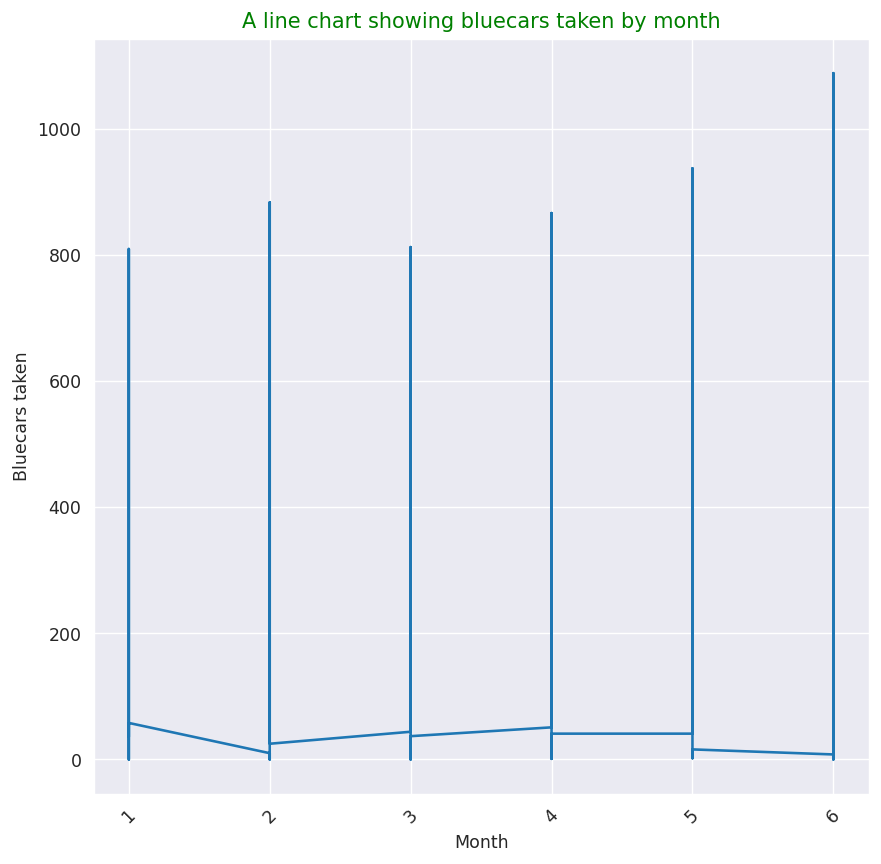

In [363]:
# Plotting a line chart using the selected sample dataframe

# Line chart of the bluecars taken by month


# figure size specifications
# creating a line chart using matplotlib
# Rotating our x axis ticks
# labelling the title
# labelling the x axis
# labelling the y axis
# Displaying our chart



plt.figure(figsize = (8,8), dpi = 125)
plt.plot(strat_samp.month, strat_samp.bluecars_taken_sum)
plt.xticks(rotation = 45)
plt.title('A line chart showing bluecars taken by month', color = 'Green')
plt.xlabel('Month')
plt.ylabel('Bluecars taken')
plt.show()



# the line chart below shows an unfamiliar trend.

# 9 Hypothesis Testing

    Z Test.

- When to use Z test:

 - When your sample size is greater than 30. Otherwise, use a t test.

 - Data points should be independent from each other. i.e, one data point isn’t related or doesn’t affect another data point.

 - Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.

 - Your data should be randomly selected from a population, where each item has an equal chance of being selected.

 - Sample sizes should be equal if at all possible.



In [286]:
# Using a Z test to conduct our Hypothesis.
# It is the appropriate test to use here since we have a dataset larger than 30 observations.
# 

# Selecting two postal codes using simple random sampling

h_sample = autolib2.sample(n = 2, replace = False)
h_sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
11494,93350,1/4/2018,1320,Thursday,weekday,17,13,1,1
10206,93110,3/28/2018,1440,Wednesday,weekday,16,20,0,0


 **STEP 1 :**
Stating the Hypothesis


- H0 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is 0

- H1 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is not 0


OR


- H0 : U1 = U2

- Ha : U1 ≠ U2

 **STEP 2** : 
 Level of significance

 α = 0.05


In [287]:
# Creating a dataframe containing the 75012 postal code as po1

po1 = autolib2[autolib2['postalcode'] == 75012]
po1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1716,75012,1/1/2018,1440,Monday,weekday,502,512,122,120
1717,75012,1/2/2018,1438,Tuesday,weekday,406,412,109,109
1718,75012,1/3/2018,1439,Wednesday,weekday,427,423,92,95
1719,75012,1/4/2018,1320,Thursday,weekday,395,392,91,94
1720,75012,1/5/2018,1440,Friday,weekday,476,478,114,118


In [288]:
# Creating a dataframe containing the 75006 postal code as po2

po2 = autolib2[autolib2['postalcode'] == 75006]
po2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
780,75006,1/1/2018,1440,Monday,weekday,215,197,34,31
781,75006,1/2/2018,1438,Tuesday,weekday,190,192,34,38
782,75006,1/3/2018,1439,Wednesday,weekday,208,207,30,25
783,75006,1/4/2018,1320,Thursday,weekday,176,179,32,30
784,75006,1/5/2018,1440,Friday,weekday,262,261,49,45


**STEP 3 :**
Calculating the test statistic & Applying the conditions for an appropriate decision.

In [291]:
ztest , pval1 = stests.ztest(po1['bluecars_taken_sum'], x2= po2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.571771542382906e-172
reject null hypothesis


**STEP 4** :
Evaluating our results

- The p-value = 3.571771542382906e-172

- This p-value is a very small value and it is less that the level of significance (0.05), hence we Reject the Null Hypothesis


**STEP 5** :
Interpreting the results

- There is sufficient evidence to conclude that the difference in the means of blue cars taken in postal code 75012 and 75006 is not 0.

- The test was statistically significant.

# 10 **Conclusion**  

Based on the hypothesis test, we conclude that the difference between the average number of cars taken from station with postal code 75015 and the average number of cars taken from station with postal code 75016 is statistically significant; therefore we reject the null hypothesis for the alternative hypothesis.